In [2]:
#import  libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Business Understanding

Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season since 1952. The 2018 Black Friday American consumers spent $7.9 billion, making it the biggest online shopping day in U.S. history. It is neccessary for the trader to get insights of the customers to increase the revenue. 

The Dataset was downloaded from Kaggle. The following questions will be answered to help the sellers

First:User distribution by age and gender?

Second: what are the most top 20 popular products?

Third: what is the correlation between muiltiple attribute gender, Age, Occupation,etc.?

By using CRISP approach I believe it will give an informative feedback to the sellers to guide them on this important period.

# Data Understanding
The dataset were provided by Kaggle, they are sample of the transactions made in a retail store. 

In [3]:
df = pd.read_csv('./BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# General describation of the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
print("number of rows",df.shape[0])
print("number of columns",df.shape[1])

number of rows 537577
number of columns 12


In [6]:
print("columns:")
df.columns

columns:


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Prepare Data
In this step I will deal with data so it is going to be prepared for my analysis

- I will treat the null values
- Encode the categorical data so it can be represtitive 

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

"Product_Category_2" & "Product_Category_3"  are the only two attributen that has zero values and what we can see from the discribtion the min values of "Product_Category_2" & "Product_Category_3" are non-zero. So I conclude is that the missing value in "Product_Category_2" & "Product_Category_3" means the customer didn't buy anything in these two category, So i will replace them with 0.

In [17]:
#fillna full all null values in the dataframe
df.update(df.fillna(0)) 

In [9]:
# One-hot encode the feature:  Gender, Age, City_Category, Stay_in_curent_City_Years
le = LabelEncoder()
df['Gender_onehot_encode']              = le.fit_transform(df['Gender'].astype(str))
df['Age_onehot_encode']                 = le.fit_transform(df['Age'].astype(str))
df['City_Category_onehot_encode']       = le.fit_transform(df['City_Category'].astype(str))
df['Stay_In_Current_City_Years_encode'] = le.fit_transform(df['Stay_In_Current_City_Years'].astype(str))

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_onehot_encode,Age_onehot_encode,City_Category_onehot_encode,Stay_In_Current_City_Years_encode
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0,0,0,2
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,2
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0,0,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,0,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1,6,2,4


In [18]:
#double ckeck if there is null vlaues
df.isnull().sum()

User_ID                              0
Product_ID                           0
Gender                               0
Age                                  0
Occupation                           0
City_Category                        0
Stay_In_Current_City_Years           0
Marital_Status                       0
Product_Category_1                   0
Product_Category_2                   0
Product_Category_3                   0
Purchase                             0
Gender_onehot_encode                 0
Age_onehot_encode                    0
City_Category_onehot_encode          0
Stay_In_Current_City_Years_encode    0
dtype: int64

# Answers based on dataset


it is necessary for the sellers to identify the audience, that will help him to target what kind of ads he/she will invest in such as type of ad type of product etc.

### Q1:User distribution by age and gender?

<BarContainer object of 7 artists>

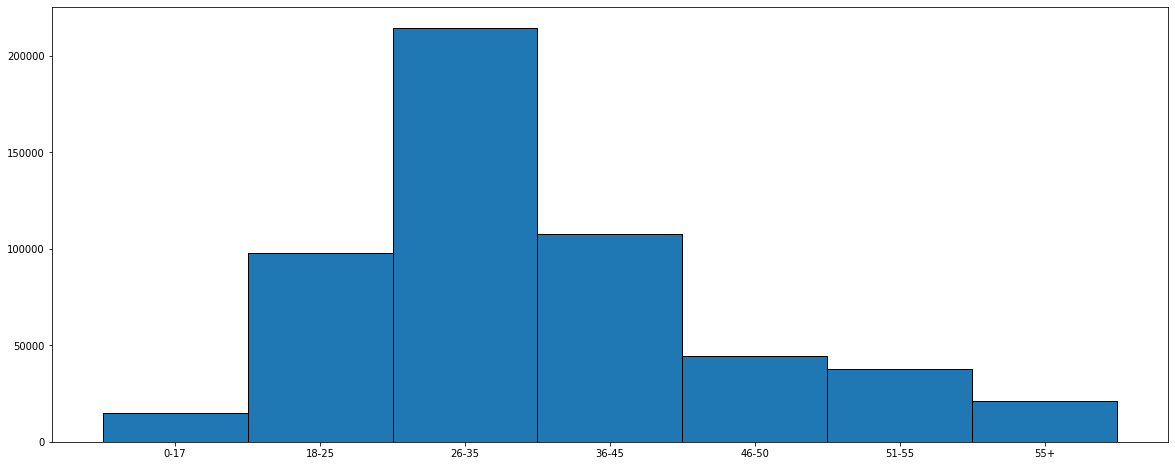

In [12]:
plt.figure(figsize = (20,8))
u, counts = np.unique(df['Age'], return_counts=True)
plt.bar(u.astype(str), counts,align="center", ec="k", width=1)

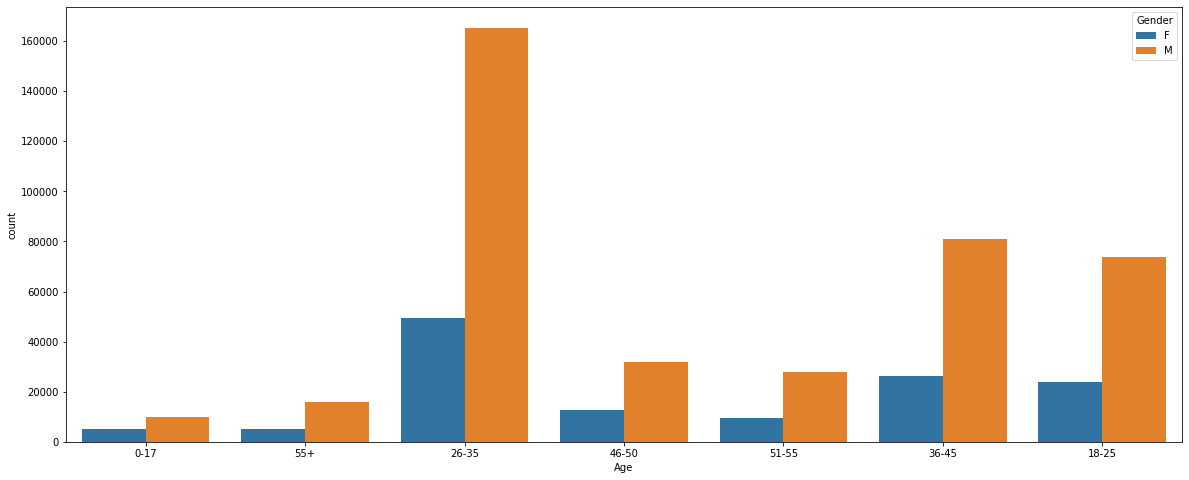

In [13]:

plt.figure(figsize = (20,8))
sns.countplot(df['Age'],hue=df['Gender'])

We can observe from the plot that most of the users who participate in the Black Friday Sale are from age group 26-35, 36-45 and 18-25, which is reasonable as these customers needs to target those kind of discounts as each group has its own finincal concerns such age 26-35 just start their career or start working after colleage and group 18-25 they don't make alot of money they need to tackle this peroid of discounts and finally 36-45 they need to plan for their retirment life.

From the second plot, we can find for all age group, Male customers shop more comparing to Female customers.

### what are the most top 20 popular products?

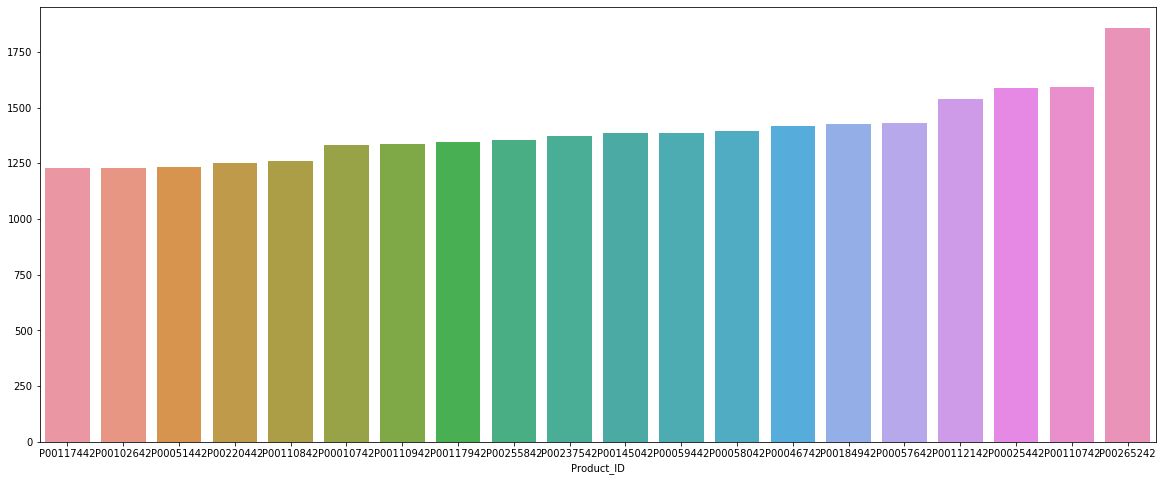

In [14]:

plt.figure(figsize = (20,8))
products = df.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values()
sns.barplot(products.index, products.values)

### Q3:what is the correlation between muiltiple attribute gender, Age, Occupation,etc.?

In [15]:
Corre = df[['Gender_onehot_encode', 'Age_onehot_encode', 'Occupation', 'City_Category_onehot_encode', 
    'Stay_In_Current_City_Years_encode', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
Corre.corr()

,Gender_onehot_encode,Age_onehot_encode,Occupation,City_Category_onehot_encode,Stay_In_Current_City_Years_encode,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender_onehot_encode,1.000000,-0.004413,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.018440,0.028403,0.060086
Age_onehot_encode,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.312079,0.061951,0.054762,0.057155,0.017717
Occupation,0.117294,0.091898,1.000000,0.033781,0.031203,0.024691,-0.008114,-0.000031,0.013452,0.021104
City_Category_onehot_encode,-0.004129,0.122308,0.033781,1.000000,0.019948,0.040173,-0.027444,-0.012120,-0.002672,0.068507
Stay_In_Current_City_Years_encode,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.012663,-0.004182,-0.001781,0.002039,0.005470
Marital_Status,-0.010379,0.312079,0.024691,0.040173,-0.012663,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,-0.018440,0.054762,-0.000031,-0.012120,-0.001781,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.028403,0.057155,0.013452,-0.002672,0.002039,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.060086,0.017717,0.021104,0.068507,0.005470,0.000129,-0.314125,-0.209973,-0.022257,1.000000


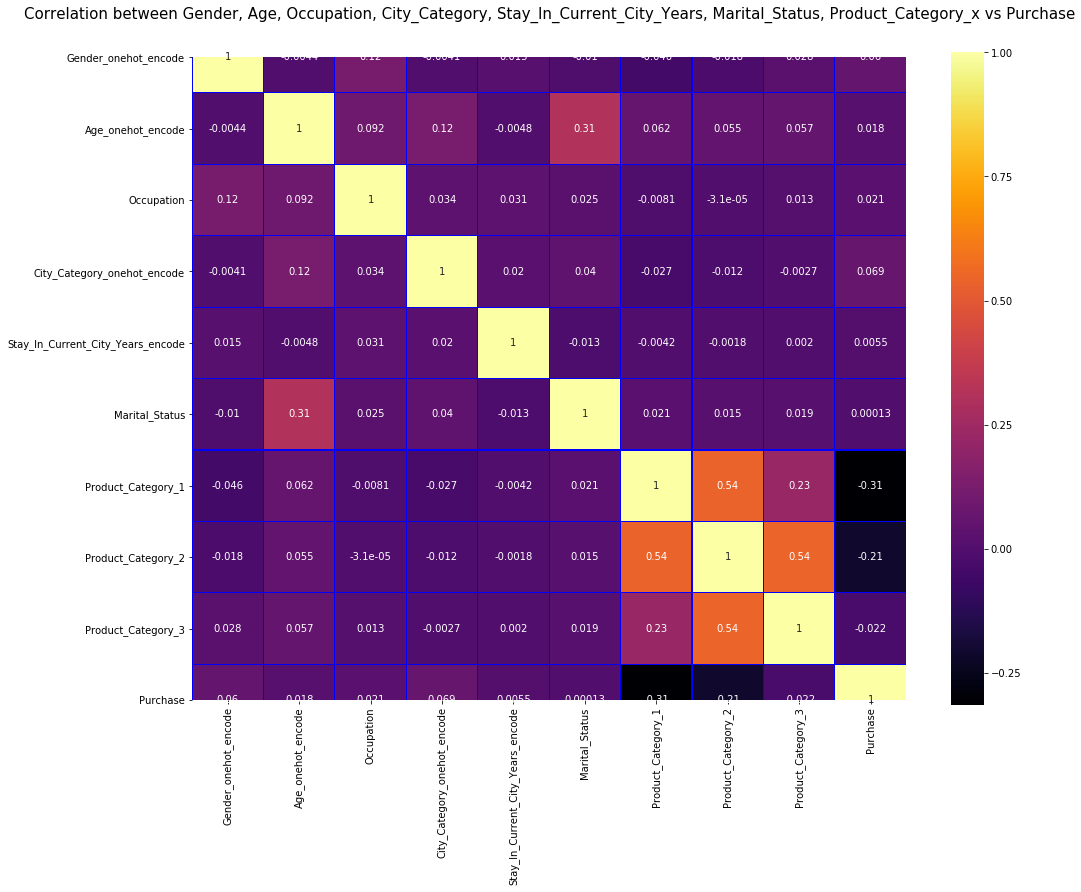

In [16]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_x vs Purchase', y=1.05, size=15)
sns.heatmap(Corre.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='Blue', annot=True)

The heatmap shows the correlation between different attribute. we can summarize the following findings.
    - Gender & City_Category are most positive related to Purchase comparing to other features.
    - All Product_Category attribute are negatively correlated to Purchase.
    - The three Product_Category are highly correlated to each other.
    - Martial_Status are highly related to Age